In [406]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler 

from sklearn.model_selection import learning_curve, validation_curve

import warnings
warnings.filterwarnings('ignore')

In [407]:
data = pd.read_csv('./heart.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [408]:
goal_column = 'DEATH_EVENT'

In [409]:
data.shape

(299, 13)

In [410]:
data = data.dropna(axis=1, how='any')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [411]:
data.shape

(299, 13)

In [412]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [413]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [414]:
X = data.drop(goal_column, axis=1)
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [415]:
Y = data[[goal_column]]
Y

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1
...,...
294,0
295,0
296,0
297,0


In [416]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [417]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [418]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

X_train: (224, 12)
X_test: (75, 12)
Y_train: (224, 1)
Y_test: (75, 1)


Accuracy: 0.7946428571428571 0.7466666666666667
Precision: 1.0 0.6
Recall: 0.39473684210526316 0.15
F1: 0.5660377358490566 0.24


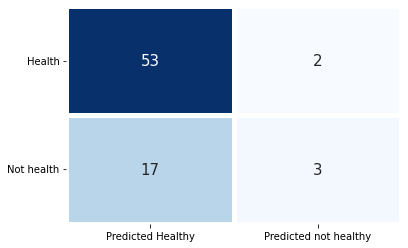

In [419]:
My_KNN = KNeighborsClassifier(n_neighbors=2)
My_KNN.fit(X_train, Y_train)
My_KNN_target_1_0 = My_KNN.predict(X_train)
My_KNN_Y_Pred = My_KNN.predict(X_test)
print(f'Accuracy:',accuracy_score(Y_train,My_KNN_target_1_0), accuracy_score(Y_test,My_KNN_Y_Pred))


In [431]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), X, Y, cv=4, scoring='accuracy')
scores

array([0.62666667, 0.62666667, 0.66666667, 0.66216216])

In [432]:
np.mean(scores)

0.6455405405405406

In [422]:
n_range = np.array(range(1, 50, 1))
tuned_parameters = [{'n_neighbors': n_range}]
n_range

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [433]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=4, scoring='accuracy', return_train_score=True)
clf_gs.fit(X, Y)
clf_gs.best_params_

CPU times: user 7.93 s, sys: 10.7 ms, total: 7.94 s
Wall time: 8.04 s


{'n_neighbors': 16}

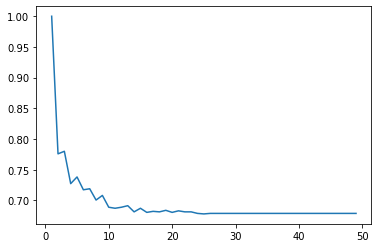

In [424]:
plt.plot(n_range, clf_gs.cv_results_["mean_train_score"]);

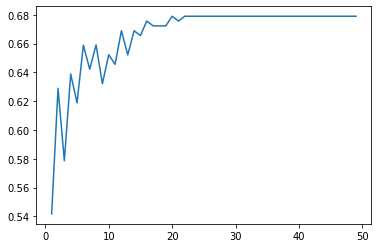

In [425]:
plt.plot(n_range, clf_gs.cv_results_["mean_test_score"]);

Accuracy: 0.71875 0.8
Precision: 0.8823529411764706 1.0
Recall: 0.19736842105263158 0.25
F1: 0.32258064516129026 0.4


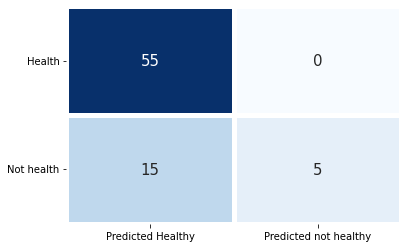

In [434]:
KNN_Searched = KNeighborsClassifier(n_neighbors=16)
KNN_Searched.fit(X_train, Y_train)
KNN_Searched_target_1 = KNN_Searched.predict(X_train)
Y_KNN_Searched_Pred= KNN_Searched.predict(X_test)

print(f'Accuracy:',accuracy_score(Y_train,KNN_Searched_target_1),accuracy_score(Y_test,Y_KNN_Searched_Pred))
print(f'Precision:',precision_score(Y_train,KNN_Searched_target_1),precision_score(Y_test, Y_KNN_Searched_Pred))
print(f'Recall:',recall_score(Y_train,KNN_Searched_target_1),recall_score(Y_test,Y_KNN_Searched_Pred))
print(f'F1:',f1_score(Y_train,KNN_Searched_target_1),f1_score(Y_test,Y_KNN_Searched_Pred))
cm = confusion_matrix(Y_test, Y_KNN_Searched_Pred)
sns.heatmap(cm,cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
    yticklabels = ['Health', 'Not health'], xticklabels = ['Predicted Healthy', 'Predicted not healthy'])
plt.yticks(rotation = 0)
plt.show()